# 1번
- 1-(a) : X가 1 증가할 때마다 Y는 0.5씩 증가한다.
- 1-(b) : x가 1 증가할 때마다 오즈는 exp(0.5)배 증가한다. 
- 1-(c) : 전모형 탐색법은 모든 모델에서 가작 낮은 scroe를 선택하는 방식으로 최적의 모형을 찾을 수 있지만,  p 변수가 많은 경우에는 대규모의 계산량이 필요하므로 비효율적이다. 

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import time  
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 2-(a)
- 첨부된 german.txt 데이터를 read csv 함수를 이용해 German이라는 이름으로 불러오시오
(단, sep=‘ ’, header=None으로 설정하시오).

In [ ]:
data_file = "/content/drive/MyDrive/Colab Notebook_2022_2semester/datamining/data/german.txt"
data = pd.read_csv(data_file, sep=' ', header=None)
print(data.shape)
data.head()

(1000, 21)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


# 2-(b) 
- German 데이터에서 2,5,8,11,13,16,18번째 column을 입력 변수, 21번째 변수를 출력 변수로
설정하고, 각각을 x German, y German에 저장하시오. 또한, y German의 모든 값에 1을
빼서 0과 1의 값이 되도록 하시오. (10pt)


In [ ]:
x_German = data[[1,4,7,10,12,15,17]]
y_German = data[20]-1
y_German

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: 20, Length: 1000, dtype: int64

# 2-(c) 
- train test split 함수를 이용하여 x German, y German 데이터를 7:3으로 분할하여 학습 데
이터, 시험 데이터를 만드시오 (70%가 학습 데이터, 30%가 시험 데이터이고, random state
는 1234로 설정).

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x_German, y_German, test_size=0.3, random_state=1234)
print(train_x.shape)
print(test_x.shape)

(700, 7)
(300, 7)


# 2-(d)
 - logistic regression model을 적합하려고 한다 (Regularization method 이용 X)

In [ ]:
logistic = LogisticRegression(penalty='none')
logistic.fit(train_x, train_y)

LogisticRegression(penalty='none')

In [ ]:
print(logistic.intercept_)
print(logistic.coef_)

[-0.00159107]
[[ 0.01045078  0.00010953 -0.00228413 -0.00276072 -0.04016643 -0.00210971
  -0.00148209]]


## 
Y (확률) = -0.00159107 +  0.01045078 * X1 + 0.00010953 * X2 -0.00228413 * X3 -0.00276072 * X4 -0.04016643 * X5 -0.00210971 * X6
  -0.00148209 * X7

- X1,X2,X3,X4,X5,X6,X7 : 각각 German데이터의 2,5,8,11,13,16,18번째 column



# 2 - (e)

In [ ]:
test_prob = logistic.predict_proba(test_x)[:,1]                       # [0일 확률. 1일 확률] 증 y가 1일 추정확률값 = score 만 뽑음             /// predict_log_prob
cut_off = 0.5
test_y_pred = np.array((test_prob > cut_off)).astype(dtype='int')     # cut off보다 크면, true = 1 / 작으면 0

print(sklearn.metrics.confusion_matrix(test_y, test_y_pred))          # 오차행렬

print('오분류율: ', 1- (test_y_pred==test_y).mean())                        
print('민감도: ', sklearn.metrics.recall_score(test_y, test_y_pred))  
print('특이도: ', sklearn.metrics.recall_score(test_y, test_y_pred, pos_label=0))

[[196  10]
 [ 87   7]]
오분류율:  0.32333333333333336
민감도:  0.07446808510638298
특이도:  0.9514563106796117


# 2-(d)

- ROC curve 및 ROC-AUC

0.6009089031191903
0.6009089031191903


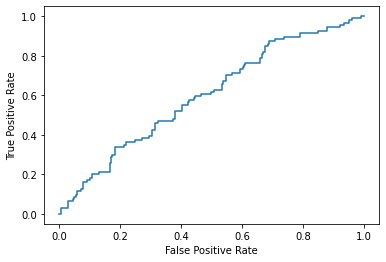

In [ ]:
fpr, tpr, _ = sklearn.metrics.roc_curve(test_y, test_prob)
roc_display = sklearn.metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()    # fp= 1-특이도, tpr= 민감도   / 내가 예측한 모델을 사용했을 때, test 데이터에 대한  roc커브
print(sklearn.metrics.roc_auc_score(test_y, test_prob))                   # roc (실제 y값과 로지스틱 모형 추정을 통한 1일 확률 이용)
print(sklearn.metrics.auc(fpr, tpr))   

# 2-(e)
- PR curve 및 AP값

0.38921661086602977
0.39760766654784124


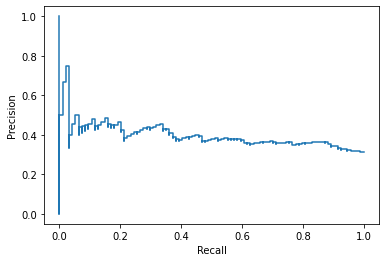

In [ ]:
precision, recall, _ = sklearn.metrics.precision_recall_curve(test_y, test_prob)       # 고려가능하 모든 cut off에 대한 precision, recall :  실제 y값과 y=1로 예측할 확률
pr_curve_display = sklearn.metrics.PrecisionRecallDisplay(precision=precision, recall=recall).plot()
print(sklearn.metrics.auc(recall, precision))                                                  # PR-AUC
print(sklearn.metrics.average_precision_score(test_y, test_prob))    